In [1]:
import numpy as np
from numpy import pi, sqrt, exp, arcsin, arctan, arccos
import numpy.ma as ma
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.use('pgf')
if mpl.get_backend() == 'pgf':
    pass
else:
    %matplotlib inline 
    %config InlineBackend.figure_format = 'retina'
    
FIGURE_PATH='figures/'
DATA_PATH='data/'

from scipy.constants import h, m_e, k, N_A, pi, e, hbar, u, k, mu_0

from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2
from scipy.special import gamma

In [2]:
def sf(x):
    # calculate significant figures
    # return: decimal place to be rounded to
    if isinstance(x, float) or isinstance(x,int):
        if x == 0:
            return 20 
        else:
            return int(-1 * np.floor(np.log10(x)) + 1)
    else:
        return (-1 * np.floor(np.log10(np.min(ma.masked_where(x==0,x)))) + 1).astype(int)

In [3]:
def cm2inch(lst):
    inch = 2.54
    if isinstance(lst, list):
        return [x/inch for x in lst] 
    elif isinstance(lst, float):
        return lst/inch

default_width =  cm2inch(21/sqrt(2)) # 5.78853 # approx 14.7cm
default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean
print(default_width)

5.846158427132873


In [4]:
default_width = cm2inch(21/sqrt(2))
default_ratio = default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean

In [5]:
from matplotlib import rcParams
from matplotlib import cycler
if mpl.get_backend() == 'pgf':
    rcParams.update({'legend.loc' : 'best'})
    rcParams.update({
        "text.usetex": True,
        "pgf.texsystem": "xelatex",
        "pgf.rcfonts": False,
        "font.family": "serif",
        "font.serif": [],
        "font.sans-serif": [],
        "font.monospace": [],
        "figure.figsize": [default_width, default_width * default_ratio],
        "pgf.preamble": [
            r"\usepackage[utf8x]{inputenc}",
            r"\usepackage[T1]{fontenc}",
        ],
        "figure.constrained_layout.use": True,
    })
    rcParams.update({'savefig.bbox' : 'standard'})
    rcParams.update({'savefig.pad_inches' : 0.0})
else:
    rcParams.update({'figure.autolayout': True})
    rcParams.update({'figure.figsize' : [15,9.47]})
    rcParams.update({'font.size' : 16})
rcParams.update({'errorbar.capsize' : 4})
rcParams.update({'legend.loc' : 'best'})
rcParams.update({'axes.prop_cycle': cycler('color', ["#cf115d", "#bce333", "#786eb3", "#99c1b8", "#0cc0aa", "#8547d9", "#76f014", "#ea85f5"])})
rcParams.update({'lines.markeredgecolor': 'black',
                 'lines.markerfacecolor': 'black'})

###### Fit function to data
```
def fit_function(x, param1, param2, param3):
    return param1*x**param3 + param2 

popt, pcov = curve_fit(fit_function, x, y, sigma = error_array)

param1 = popt[0]
param1_err = pcov[0][0]
```

###### Plot data

```
# initiate figure
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))

# plots
plt.errorbar(x, y, linestyle='none', marker='.', yerr=error_array)
plt.plot(x,fit_function(x, *popt))

# options
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('title')
# plt.xticks(x)
# plt.yscale('log') # set y scale to logarithmic
plt.legend()

# save and show
filename='filename'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
plt.savefig(FIGURE_PATH+filename+'.jpg', format='jpg')
plt.show()
```

###### Load .txt data into arrays
```
data1, data2 = np.loadtxt('data/dataset.txt', skiprows=1, usecols=(0,1), unpack=True)
```

###### Significant Figures
```
print(f"val: {round(val,sf(val_err))} +/- {round(val_err,sf(val_err))}")
```

# Teil 3: Frequenz und Phasengang eines RC-Glied 

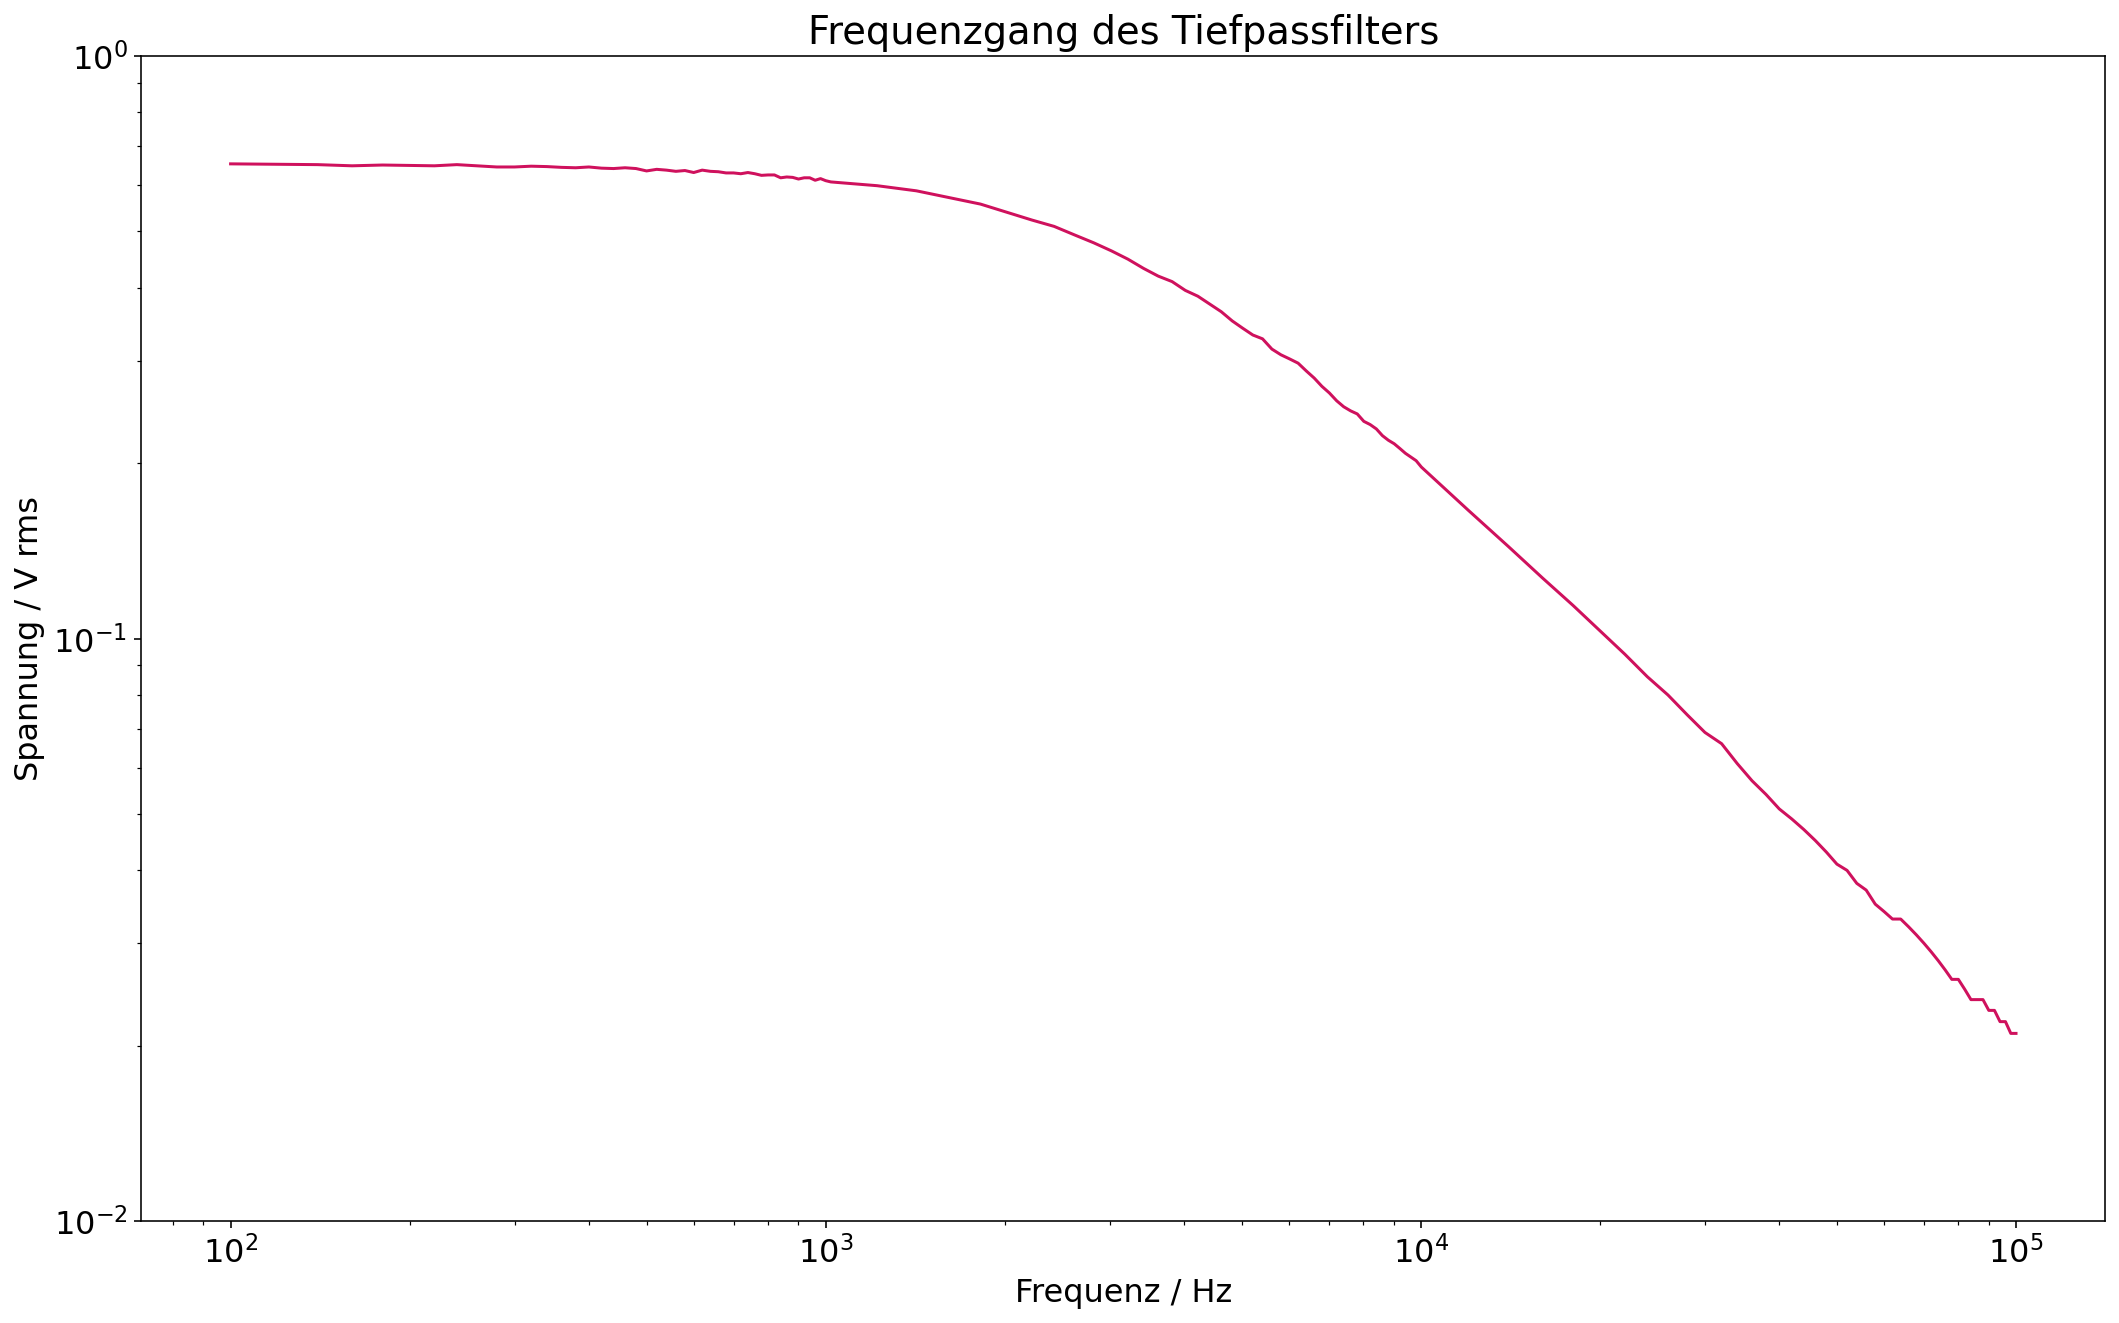

In [6]:
frequenz_1 , effektivwert_1 , effetkivwert_1_log = np.loadtxt(DATA_PATH+'Messung3_Tiefpassfilter.txt', skiprows = 1, unpack = True)

if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))
    
plt.plot(frequenz_1 , effektivwert_1)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-2, 1)
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / V rms')
plt.title("Frequenzgang des Tiefpassfilters")

# save and show
filename='aufgabe3_tiefpassfilter'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
    
plt.show()

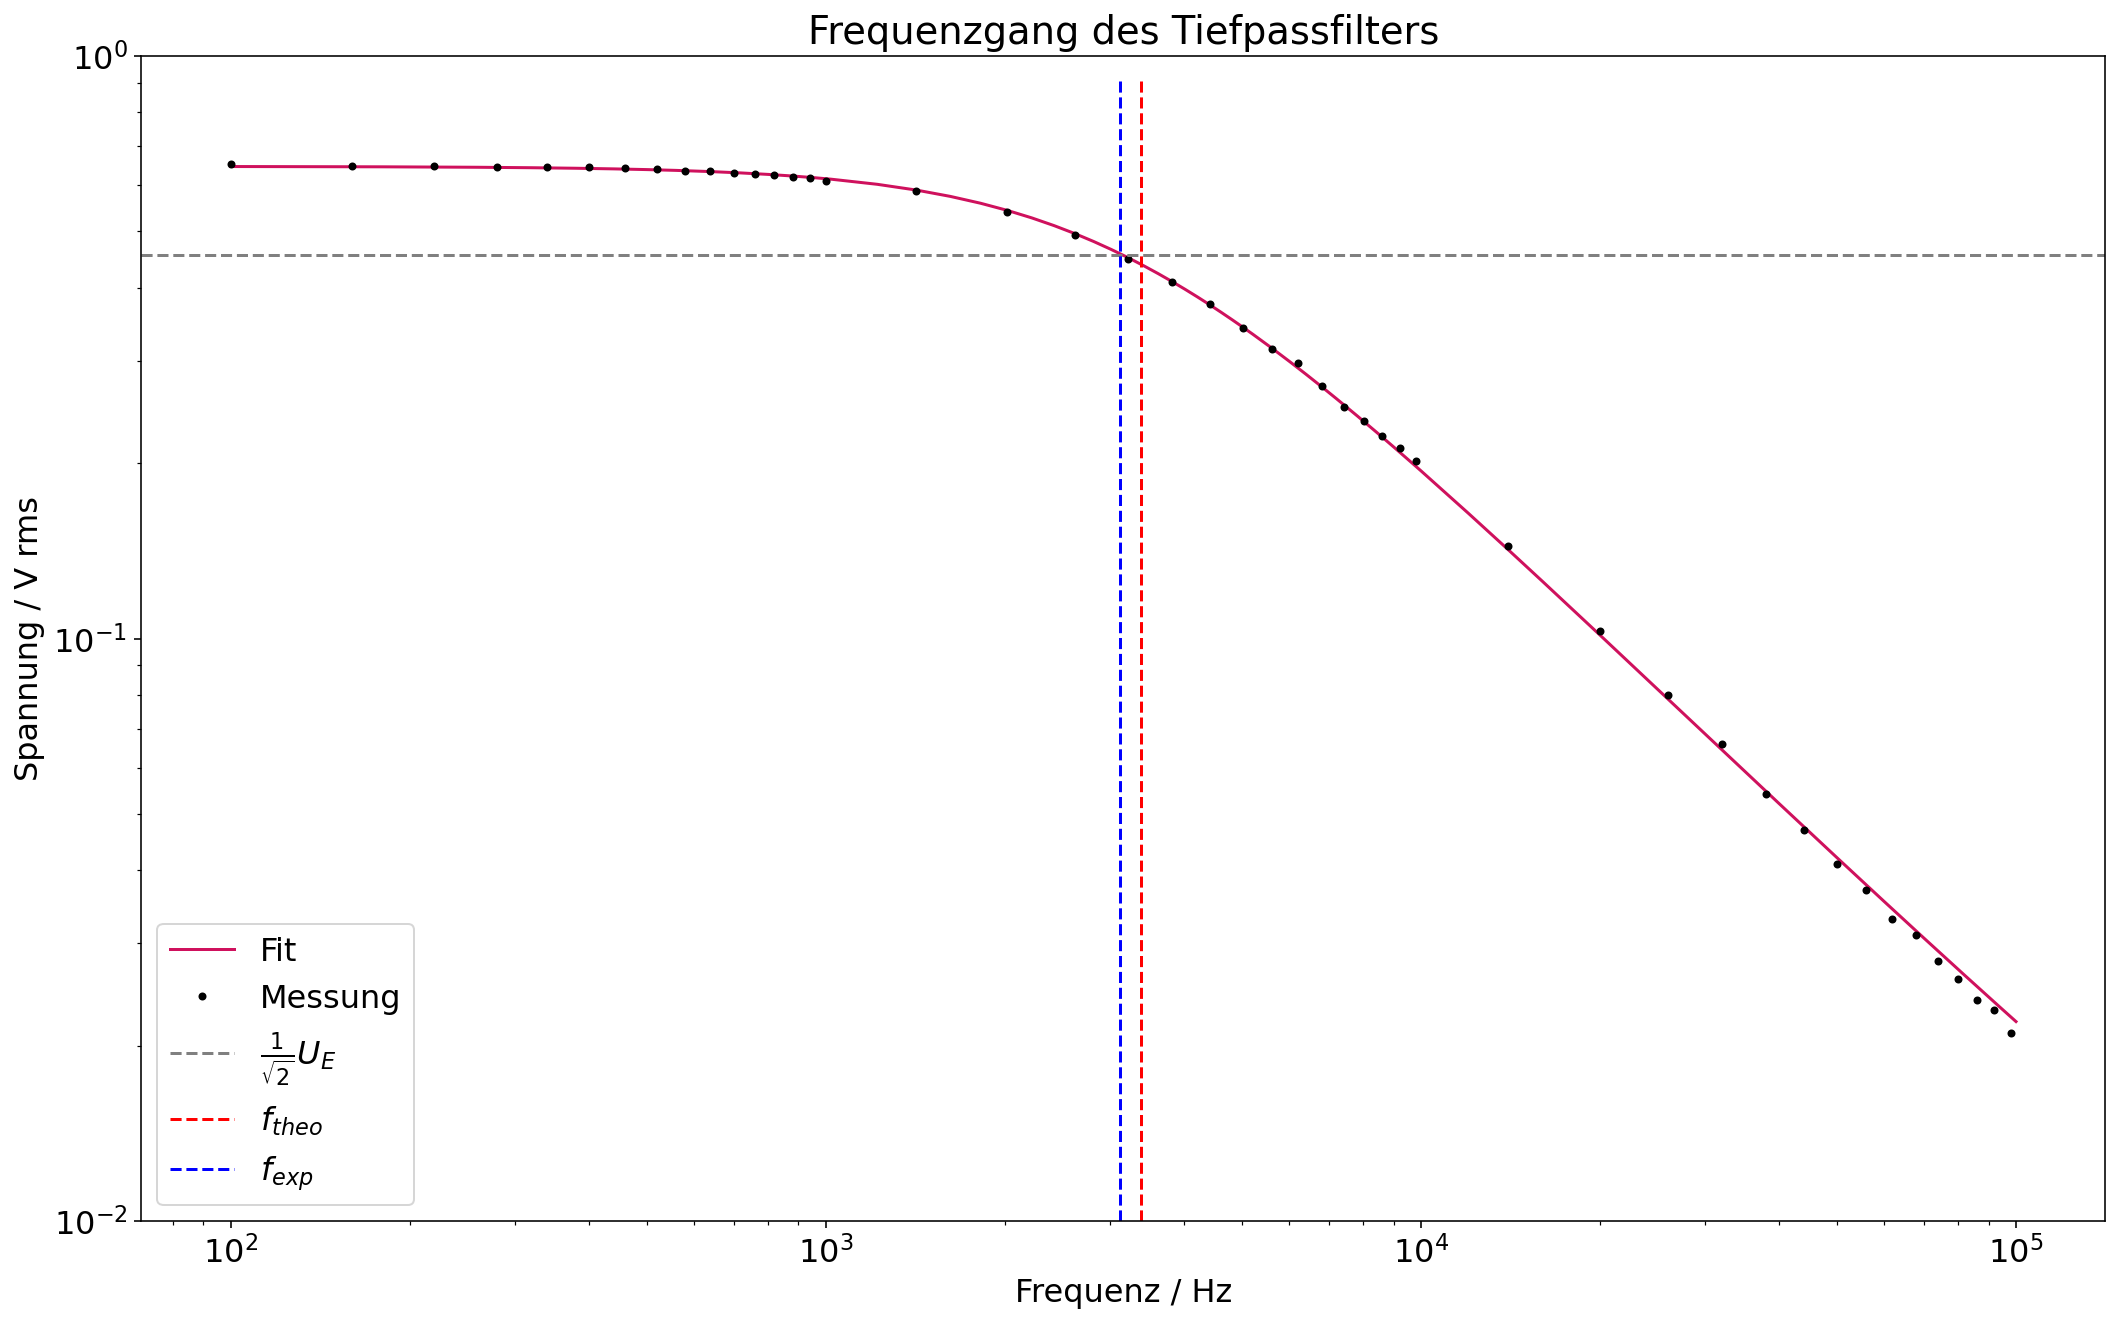

In [7]:
def fit_function_2(f, Ue, tau_2, offset):
    return Ue / np.sqrt(1 + (2 * np.pi * f *tau_2) **2) + offset

popt_2 , pcov_2 = curve_fit(fit_function_2, frequenz_1 , effektivwert_1 , p0 = [1, 0.0004 , 0.01] )

if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))
    
plt.plot(frequenz_1 , fit_function_2(frequenz_1, *popt_2), label = "Fit")
plt.plot(frequenz_1[::3] , effektivwert_1[::3] , linestyle = "None" , marker = "." , label = "Messung")

plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-2, 1)
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / V rms')
plt.title("Frequenzgang des Tiefpassfilters")

# plt.plot(frequenz_1 ,1/((2*np.pi*frequenz_1)*7.553e-05), color='grey', linestyle='--')
plt.axhline(y=popt_2[0]/np.sqrt(2), xmin=0, xmax=1, color='grey', linestyle='--', label=r'$\frac{1}{\sqrt{2}}U_E$')
plt.axvline(x=(1 / (1000 *47e-9) / (2 * np.pi)), ymin=0, ymax=0.98, color='r', linestyle='--', label=r'$f_{theo}$')
plt.axvline(x=1/popt_2[1]/(2*np.pi), ymin=0, ymax=0.98, color='b', linestyle='--', label=r'$f_{exp}$')
plt.legend()

# save and show
filename='aufgabe3_tiefpassfilter_fit'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
    
plt.show()

In [8]:
print(popt_2)

[6.44604867e-01 5.09282924e-05 1.87408227e-03]


In [9]:
R = 1e3
C = 47e-9
tau_theo = R*C
tau_theo_err = tau_theo * np.sqrt(0.05**2 + 0.1**2)
f_theo = 1 / (R * C * 2 * np.pi)
f_theo_err = f_theo * np.sqrt(0.05**2 + 0.1**2)
tau_exp = popt_2[1]
tau_exp_err = np.sqrt(pcov_2[1][1])
f_exp = 1 / tau_exp / (2 * np.pi)
f_exp_err = f_exp * tau_exp_err / tau_exp 
print(f"Bandbreite theoretisch:  = {f_theo} +/- {f_theo_err} Hz") # 1 / (R*C)= 1 / (1000 Ohm * 47 nF)
print(f"Bandbreite experimentell:  = {f_exp} +/- {f_exp_err} Hz")
print(f"Zeitkonstante theoretisch:  = {tau_theo} +/- {tau_theo_err} Hz") # 1 / (R*C)= 1 / (1000 Ohm * 47 nF)
print(f"Zeitkonstante experimentell:  = {tau_exp} +/- {tau_exp_err} Hz")

Bandbreite theoretisch:  = 3386.2753849339438 +/- 378.5970975623283 Hz
Bandbreite experimentell:  = 3125.079115397566 +/- 8.31312729051641 Hz
Zeitkonstante theoretisch:  = 4.7e-05 +/- 5.254759747124506e-06 Hz
Zeitkonstante experimentell:  = 5.0928292441533274e-05 +/- 1.3547605104431098e-07 Hz



#### Hochpassfilter


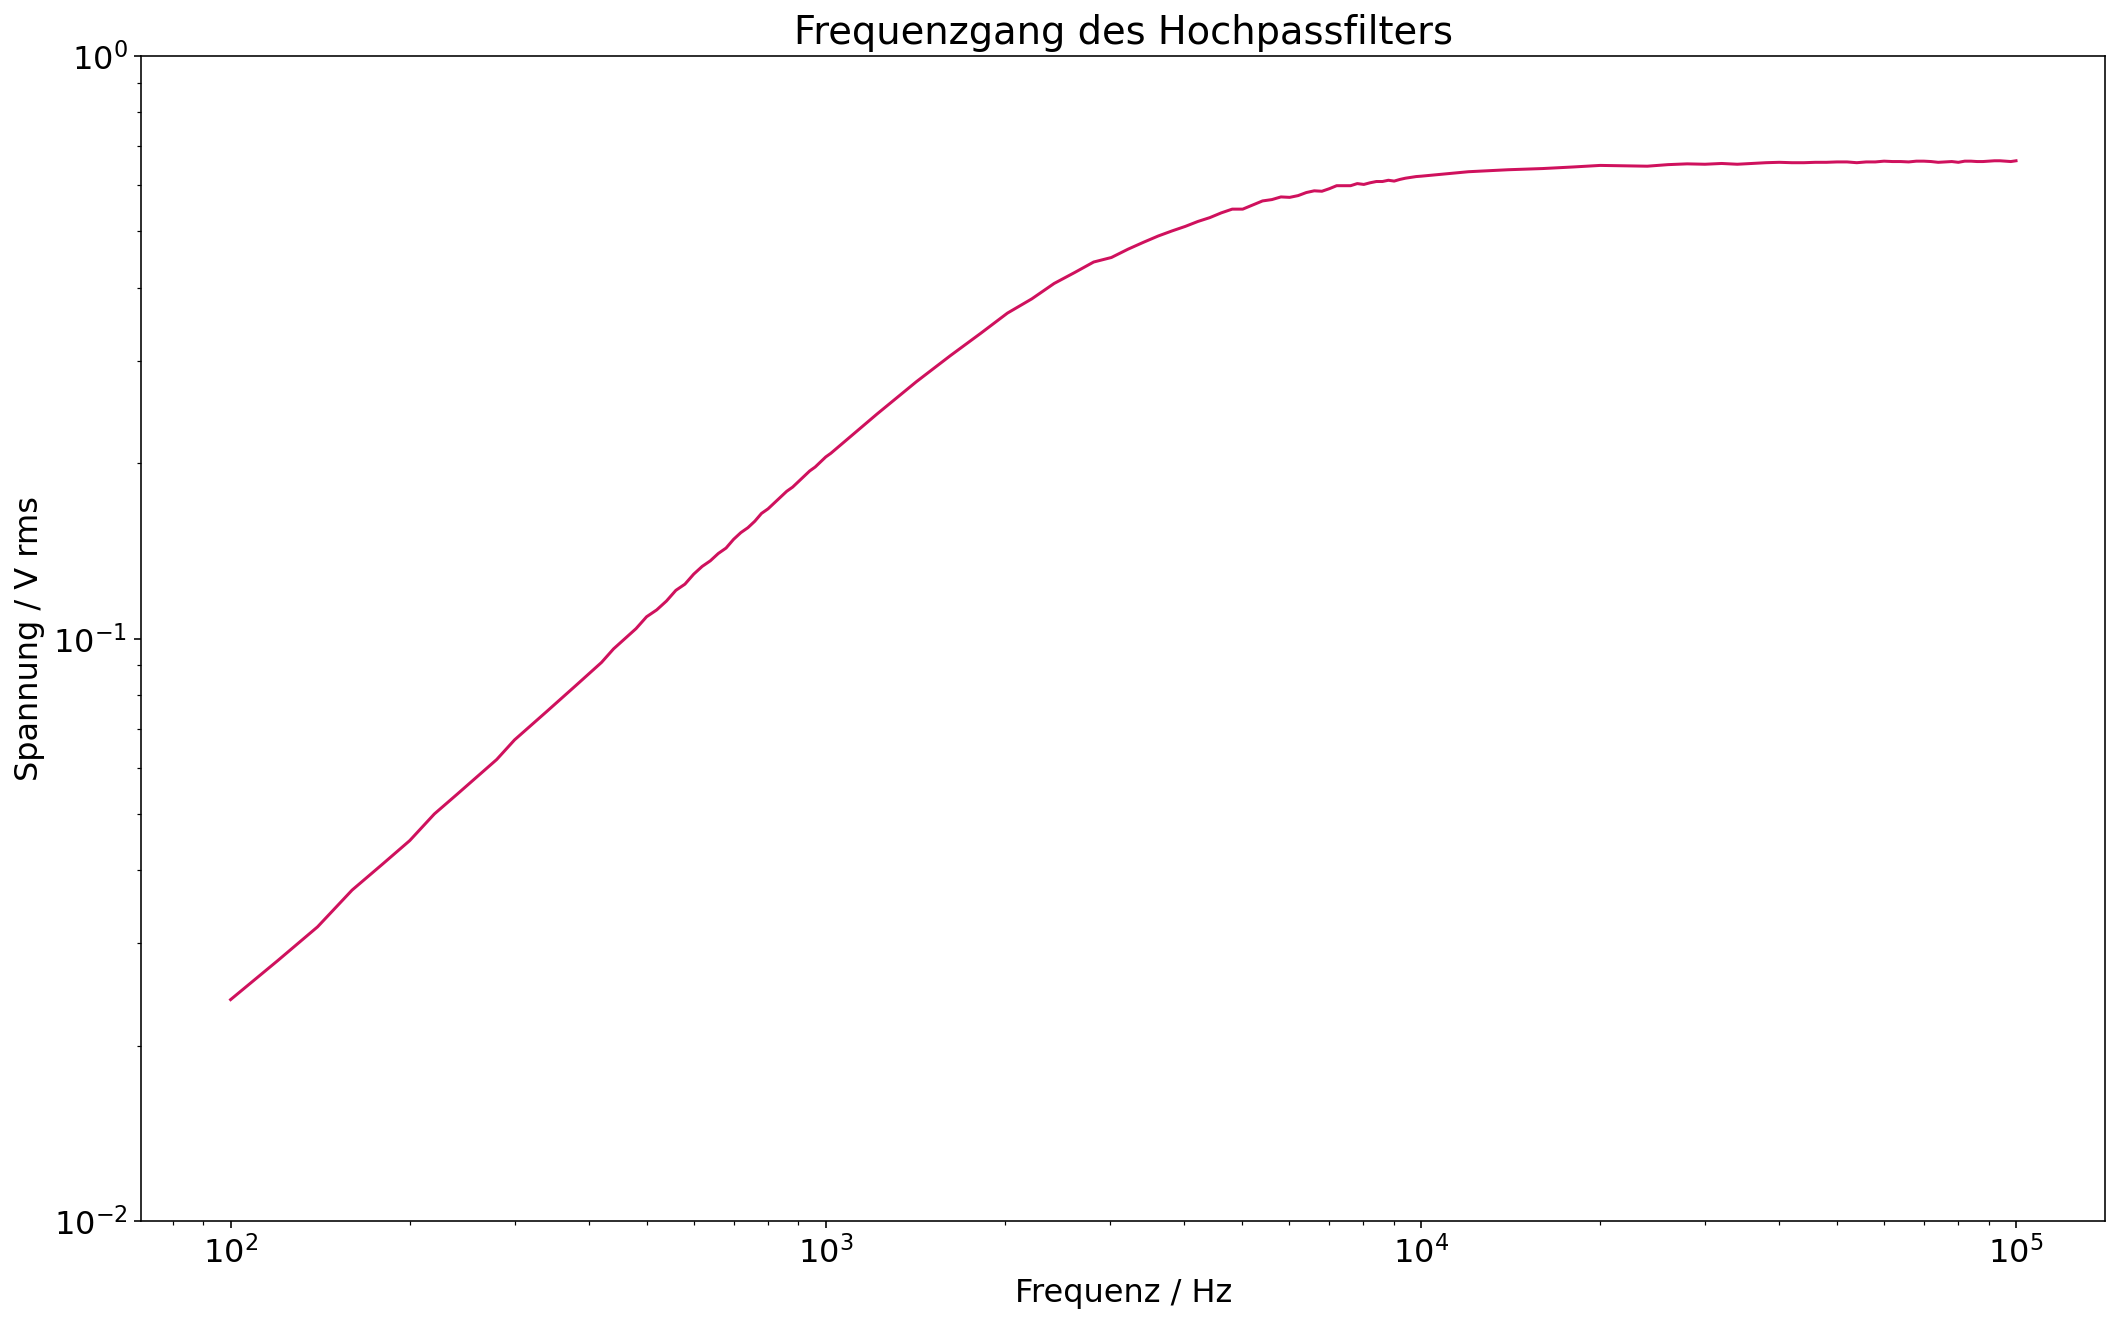

In [10]:
frequenz_1 , effektivwert_1 , effetkivwert_1_log = np.loadtxt(DATA_PATH+'Messung3_Hochpassfilter.txt', skiprows = 1, unpack = True)

if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))
    
plt.plot(frequenz_1 , effektivwert_1)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-2, 1)
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / V rms')
plt.title("Frequenzgang des Hochpassfilters")

# save and show
filename='aufgabe3_hochpassfilter'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
    
plt.show()

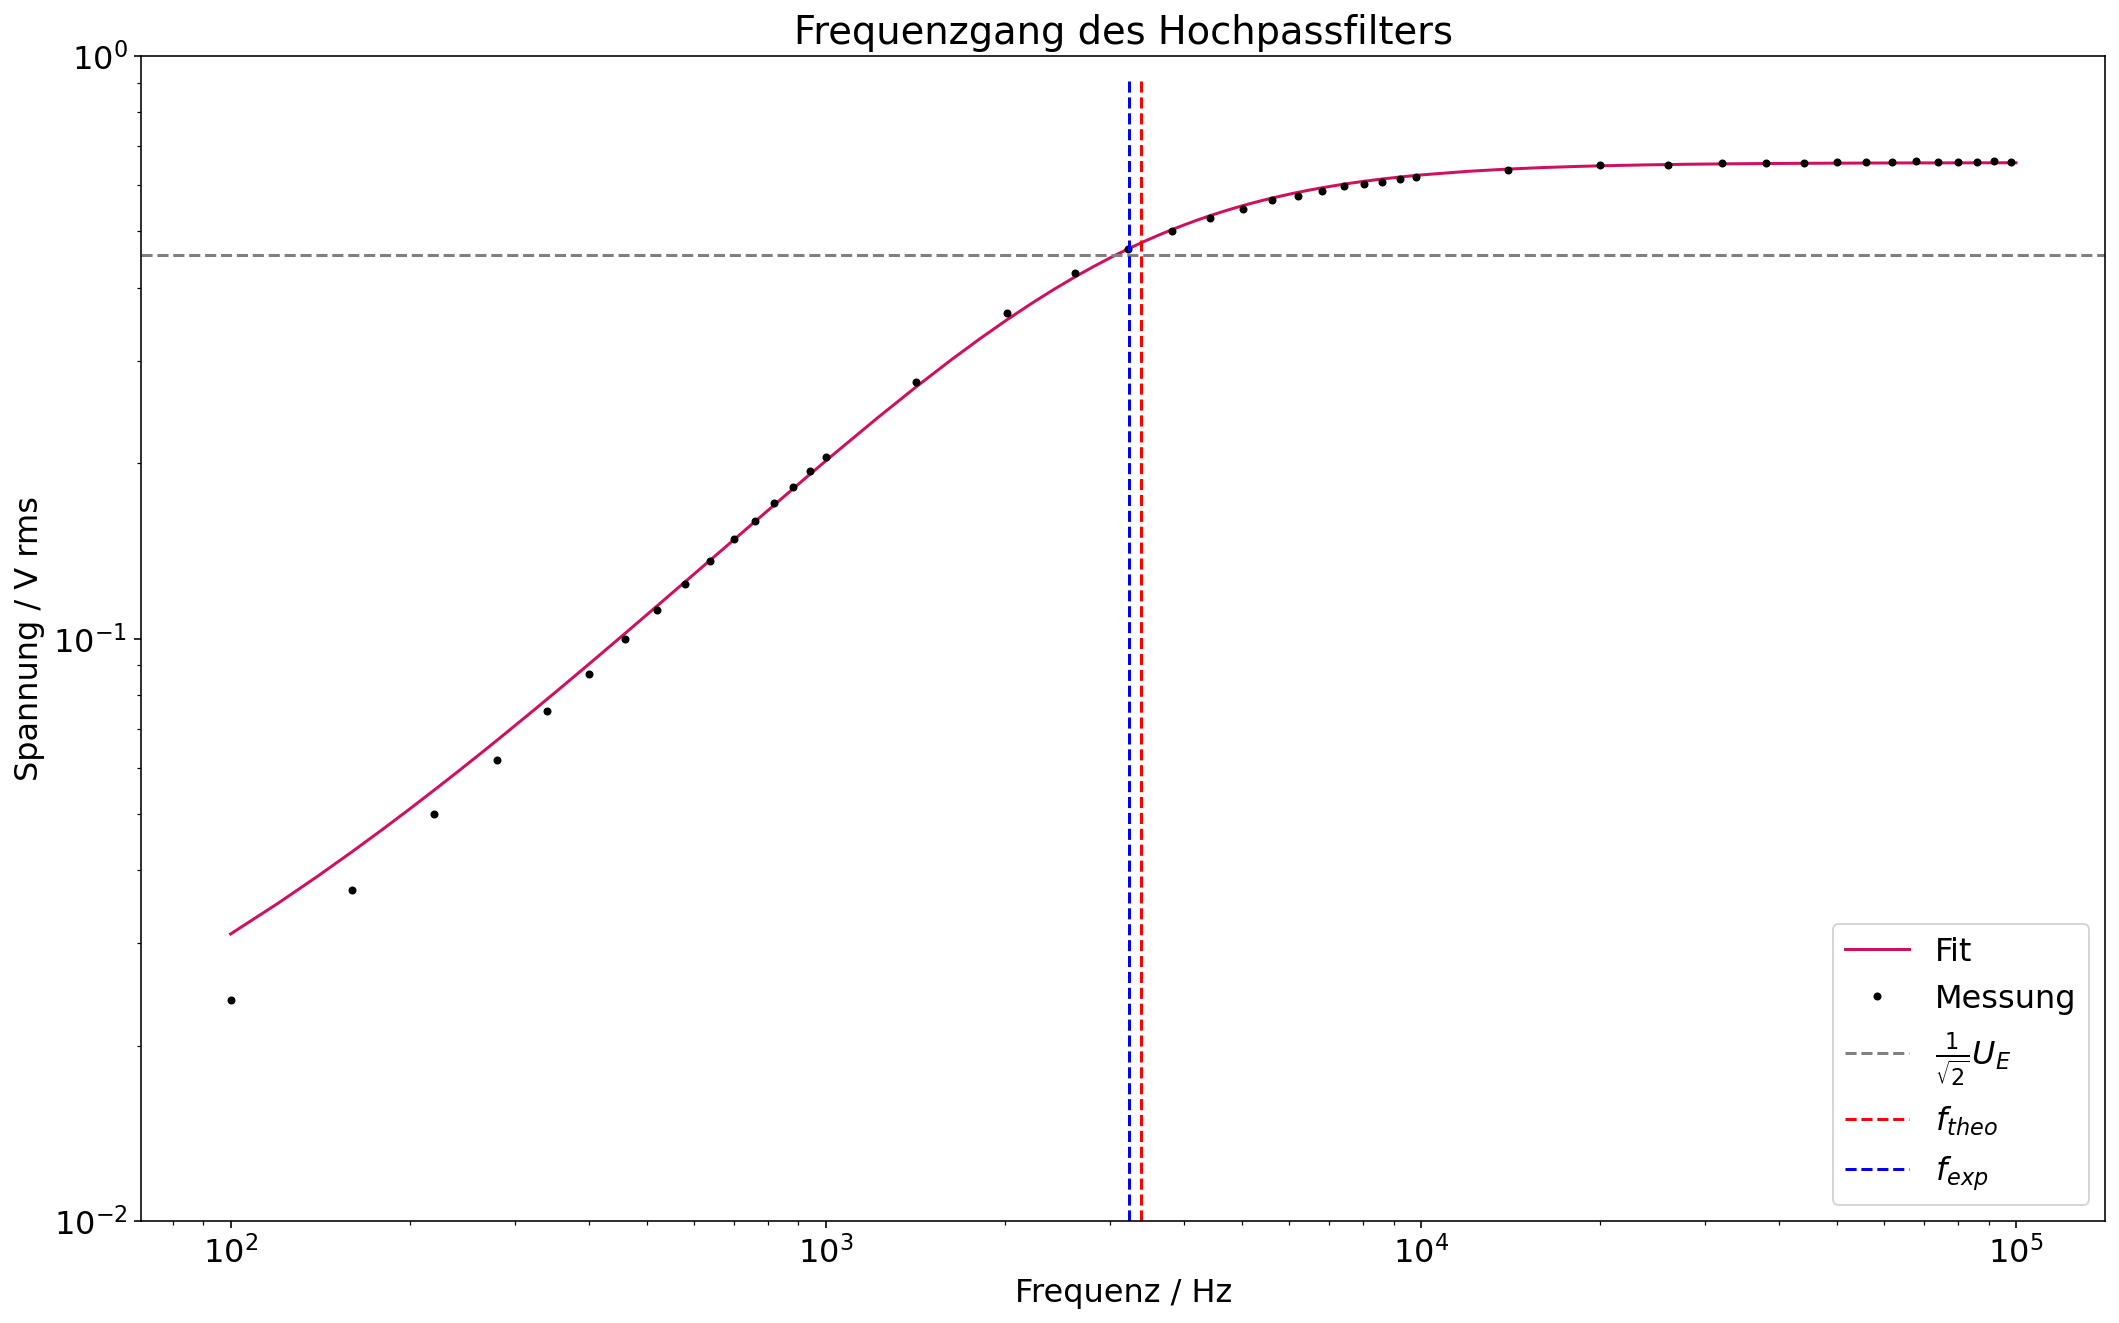

In [11]:
def fit_function_2(f, Ue, tau_2, offset):
    return Ue / np.sqrt(1 + 1/(2 * np.pi * f * tau_2)**2) + offset

popt_2 , pcov_2 = curve_fit(fit_function_2, frequenz_1[10:] , effektivwert_1[10:], p0 = [1, 5e-5 , 0.01] )

if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))
    
plt.plot(frequenz_1 , fit_function_2(frequenz_1, *popt_2), label = "Fit")
plt.plot(frequenz_1[::3] , effektivwert_1[::3] , linestyle = "None" , marker = "." , label = "Messung")

plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-2, 1)
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / V rms')
plt.title("Frequenzgang des Hochpassfilters")

# plt.plot(frequenz_1 ,1/((2*np.pi*frequenz_1)*7.553e-05), color='grey', linestyle='--')
plt.axhline(y=popt_2[0]/np.sqrt(2), xmin=0, xmax=1, color='grey', linestyle='--', label=r'$\frac{1}{\sqrt{2}}U_E$')
plt.axvline(x=(1 / (1000 *47e-9) / (2 * np.pi)), ymin=0, ymax=0.98, color='r', linestyle='--', label=r'$f_{theo}$')
plt.axvline(x=1/popt_2[1]/(2*np.pi), ymin=0, ymax=0.98, color='b', linestyle='--', label=r'$f_{exp}$')
plt.legend()

# save and show
filename='aufgabe3_hochpassfilter_fit'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
    
plt.show()

In [12]:
print(popt_2)

[6.45047016e-01 4.92422981e-05 1.11607418e-02]


In [13]:
R = 1e3
C = 47e-9
tau_theo = R*C
tau_theo_err = tau_theo * np.sqrt(0.05**2 + 0.1**2)
f_theo = 1 / (R * C * 2 * np.pi)
f_theo_err = f_theo * np.sqrt(0.05**2 + 0.1**2)
tau_exp = popt_2[1]
tau_exp_err = np.sqrt(pcov_2[1][1])
f_exp = 1 / tau_exp / (2 * np.pi)
f_exp_err = f_exp * tau_exp_err / tau_exp 
print(f"Bandbreite theoretisch:  = {f_theo} +/- {f_theo_err} Hz") # 1 / (R*C)= 1 / (1000 Ohm * 47 nF)
print(f"Bandbreite experimentell:  = {f_exp} +/- {f_exp_err} Hz")
print(f"Zeitkonstante theoretisch:  = {tau_theo} +/- {tau_theo_err} Hz") # 1 / (R*C)= 1 / (1000 Ohm * 47 nF)
print(f"Zeitkonstante experimentell:  = {tau_exp} +/- {tau_exp_err} Hz")

Bandbreite theoretisch:  = 3386.2753849339438 +/- 378.5970975623283 Hz
Bandbreite experimentell:  = 3232.0778902879492 +/- 16.674802288918645 Hz
Zeitkonstante theoretisch:  = 4.7e-05 +/- 5.254759747124506e-06 Hz
Zeitkonstante experimentell:  = 4.924229814205253e-05 +/- 2.5404882358746584e-07 Hz
